In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

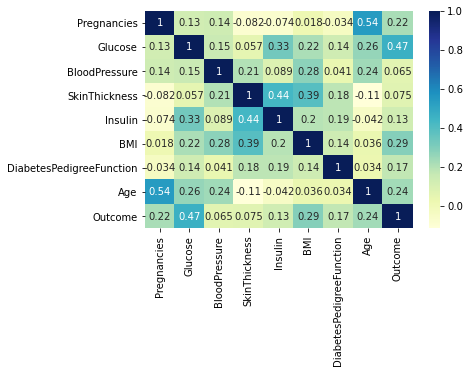

In [6]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:>

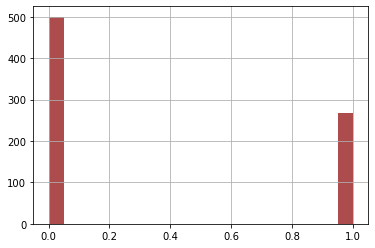

In [7]:
df['Outcome'].hist(bins=20, color='darkred',alpha=0.7)

In [19]:
x= df.drop('Outcome', axis=1)
y= df['Outcome']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nb= GaussianNB()

In [55]:
nb.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred_nb= nb.predict(x_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [58]:
accuracy_score(y_test,y_pred_nb)

0.7447916666666666

In [59]:
y_pred_nb_train= nb.predict(x_train)

In [60]:
accuracy_score(y_train,y_pred_nb_train)

0.7604166666666666

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cv= cross_val_score(nb,x,y, scoring='accuracy', cv=10)
cv

array([0.72727273, 0.75324675, 0.79220779, 0.71428571, 0.71428571,
       0.79220779, 0.76623377, 0.80519481, 0.72368421, 0.77631579])

In [84]:
cv[1]

0.7532467532467533

# Naive-Bayes Test and Training accuracy Score

In [ ]:
# Test : 75.32%
# train: 76.04%

# Random Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_cls= RandomForestClassifier()

In [68]:
rf_cls.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
y_pred_rf= rf_cls.predict(x_test)

In [71]:
accuracy_score(y_test,y_pred_rf)

0.765625

In [72]:
y_pred_rf_train= rf_cls.predict(x_train)

In [73]:
accuracy_score(y_train,y_pred_rf_train)

1.0

In [74]:
from sklearn.model_selection import cross_val_score

In [77]:
cv= cross_val_score(rf_cls,x,y,scoring='accuracy', cv=20)

In [79]:
print(cv)

[0.66666667 0.71794872 0.82051282 0.76923077 0.74358974 0.74358974
 0.69230769 0.64102564 0.73684211 0.86842105 0.78947368 0.84210526
 0.71052632 0.92105263 0.76315789 0.89473684 0.73684211 0.65789474
 0.73684211 0.89473684]


In [80]:
cv[13]

0.9210526315789473

In [ ]:
# Test data = 92.1 %
# Training data= 100 %